In [2]:
from PIL import Image
import shutil
import pandas as pd
import numpy as np
import os
import random
import time
import copy
import cv2
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

In [3]:
# 데이터 받아오기
data = pd.read_excel('../MoldingSand2/Data/Preprocessing/1and2_remove.xlsx',engine='openpyxl',sheet_name='Sheet3')

# 데이터 추출
df = data[['GFD-6', 'GFD-12', 'GFD-20', 'GFD-30', 'GFD-40', 'GFD-50', 'GFD-70',
           'GFD-100', 'GFD-140', 'GFD-200', 'GFD-270', 'Pan', 'Moisture (% by wt)',
           'Percent M.B. Active Clay', 'AFS Clay Content (% <20 µm)', 'AFS Grain Fineness No.',
           'Compactability (%)', 'Green Comp. Strength (N/sq cm)', 'Permeability No.']]

# column 이름 바꾸기
df.columns = [['GFD-6', 'GFD-12', 'GFD-20', 'GFD-30', 'GFD-40', 'GFD-50', 'GFD-70',
                 'GFD-100', 'GFD-140', 'GFD-200', 'GFD-270', 'Pan', 'Moisture',
                'Active Clay', 'ASF Clay Content', 'AFS Grain Fineness No.',
                'Compactability', 'Green Comp. Strength', 'Permeability No.']]

df.head()

,GFD-6,GFD-12,GFD-20,GFD-30,GFD-40,GFD-50,GFD-70,GFD-100,GFD-140,GFD-200,GFD-270,Pan,Moisture,Active Clay,ASF Clay Content,AFS Grain Fineness No.,Compactability,Green Comp. Strength,Permeability No.
0,0,0.0,0.0,0.16,1.36,5.94,18.55,16.95,2.39,0.27,0.08,0.0,2.59,7.52,8.60,58.827133,24.5,17.7,130.0
1,0,0.0,0.0,0.17,1.38,5.69,18.82,17.14,2.03,0.23,0.00,0.0,2.55,7.80,9.08,58.257809,24.5,17.7,124.0
2,0,0.0,0.0,0.28,2.51,7.16,13.81,17.64,3.75,0.32,0.00,0.0,2.60,7.52,9.06,59.652518,24.5,18.0,120.0
3,0,0.0,0.0,0.18,1.58,5.97,17.98,16.95,1.95,0.37,0.06,0.0,2.83,8.36,9.92,58.483570,24.5,19.8,132.0
4,0,0.0,0.0,0.20,1.54,6.24,18.48,16.76,1.88,0.26,0.00,0.0,3.00,8.64,9.28,57.791005,25.5,18.9,129.0


In [12]:
data_0 = np.squeeze(df[['GFD-6']].to_numpy()) # 모두 0이라서 넣어줄 필요 없을듯
data_1 = np.squeeze(df[['GFD-12']].to_numpy())
data_2 = np.squeeze(df[['GFD-20']].to_numpy())
data_3 = np.squeeze(df[['GFD-30']].to_numpy())
data_4 = np.squeeze(df[['GFD-40']].to_numpy())
data_5 = np.squeeze(df[['GFD-50']].to_numpy())
data_6 = np.squeeze(df[['GFD-70']].to_numpy())
data_7 = np.squeeze(df[['GFD-100']].to_numpy())
data_8 = np.squeeze(df[['GFD-140']].to_numpy())
data_9 = np.squeeze(df[['GFD-200']].to_numpy())
data_10 = np.squeeze(df[['GFD-270']].to_numpy())
data_11 = np.squeeze(df[['Pan']].to_numpy())
data_12 = np.squeeze(df[['Moisture']].to_numpy()) # 12 - 13 같이 들어가니까 Loss가 더 낮아짐
data_13 = np.squeeze(df[['Active Clay']].to_numpy()) # Loss를 낮추는데 역할을 한다!
data_14 = np.squeeze(df[['ASF Clay Content']].to_numpy())
data_15 = np.squeeze(df[['AFS Grain Fineness No.']].to_numpy())
data_16 = np.squeeze(df[['Compactability']].to_numpy())
data_17 = np.squeeze(df[['Green Comp. Strength']].to_numpy())
data_18 = np.squeeze(df[['Permeability No.']].to_numpy())
######################################################################################

all_data_x = np.zeros((len(data_3),11))
all_data_y = np.zeros((len(data_13),))

# all_data_x[:,0] = data_0
# all_data_x[:,1] = data_1
# all_data_x[:,2] = data_2
# all_data_x[:,3] = data_3
# all_data_x[:,4] = data_4
# all_data_x[:,5] = data_5
# all_data_x[:,6] = data_6
# all_data_x[:,7] = data_7
# all_data_x[:,8] = data_8
# all_data_x[:,9] = data_9
# all_data_x[:,10] = data_10
# all_data_x[:,11] = data_11
# all_data_x[:,12] = data_12
# all_data_x[:,13] = data_13
# all_data_x[:,14] = data_14
# all_data_x[:,15] = data_15
#17

all_data_x[:,0] = data_3
all_data_x[:,1] = data_5
all_data_x[:,2] = data_7
all_data_x[:,3] = data_8
all_data_x[:,4] = data_9
all_data_x[:,5] = data_10
all_data_x[:,6] = data_11
all_data_x[:,7] = data_12
all_data_x[:,8] = data_13
all_data_x[:,9] = data_14
all_data_x[:,10] = data_15

#18
# all_data_x[:,0] = data_3
# all_data_x[:,1] = data_5
# all_data_x[:,2] = data_6
# all_data_x[:,3] = data_7
# all_data_x[:,4] = data_8
# all_data_x[:,5] = data_9
# all_data_x[:,6] = data_10
# all_data_x[:,7] = data_11
# all_data_x[:,8] = data_12
# all_data_x[:,9] = data_13
# all_data_x[:,10] = data_14
# all_data_x[:,11] = data_15

all_data_y = data_17 # 16, 17 ,18

np.random.seed(5)

index = np.arange(0, all_data_x.shape[0])
np.random.shuffle(index)
all_data_x = all_data_x[index]
all_data_y = all_data_y[index]

print(all_data_x.shape)
print(all_data_y.shape)

(334, 11)
(334,)


In [13]:
data_y = np.zeros(len(all_data_y), dtype =int)

mini = np.min(all_data_y)
maxi = np.max(all_data_y)
boundary = (maxi - mini)/3

all_data_y -= mini

for i in range(len(all_data_y)):
    cnt = 0
    for j in range(3):
        all_data_y[i] -= boundary
        if all_data_y[i] > 0:
            cnt += 1
        else:
            data_y[i] = cnt
            break
            
# data_y

In [14]:
tsne = TSNE(random_state = 0)
digits_tsne = tsne.fit_transform(all_data_x)

colors = ['#476A2A', '#7851B8', '#BD3430', '#4A2D4E', '#875525',

               '#A83683', '#4E655E', '#853541', '#3A3120', '#535D8E']

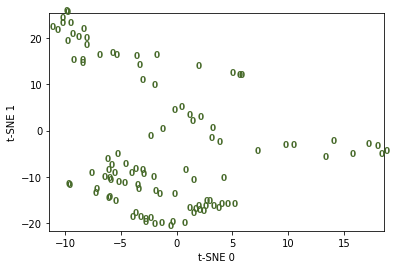

In [15]:
for i in range(len(all_data_x)): 
    if data_y[i] == 0:
        plt.text(digits_tsne[i, 0], digits_tsne[i, 1], # x,y
                 data_y[i], # 그룹
                 color=colors[data_y[i]], # 색상
                 fontdict={'weight': 'bold', 'size':9}) # font

plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max()) # 최소, 최대
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max()) # 최소, 최대

plt.xlabel('t-SNE 0') # x축 이름
plt.ylabel('t-SNE 1') # y축 이름
plt.show() # 그래프 출력

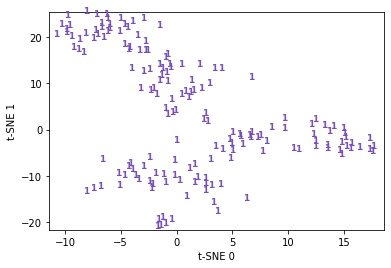

In [16]:
for i in range(len(all_data_x)): 
    if data_y[i] == 1:
        plt.text(digits_tsne[i, 0], digits_tsne[i, 1], # x,y
                 data_y[i], # 그룹
                 color=colors[data_y[i]], # 색상
                 fontdict={'weight': 'bold', 'size':9}) # font

plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max()) # 최소, 최대
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max()) # 최소, 최대

plt.xlabel('t-SNE 0') # x축 이름
plt.ylabel('t-SNE 1') # y축 이름
plt.show() # 그래프 출력

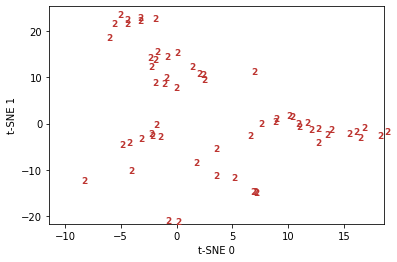

In [17]:
for i in range(len(all_data_x)): 
    if data_y[i] == 2:
        plt.text(digits_tsne[i, 0], digits_tsne[i, 1], # x,y
                 data_y[i], # 그룹
                 color=colors[data_y[i]], # 색상
                 fontdict={'weight': 'bold', 'size':9}) # font

plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max()) # 최소, 최대
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max()) # 최소, 최대

plt.xlabel('t-SNE 0') # x축 이름
plt.ylabel('t-SNE 1') # y축 이름
plt.show() # 그래프 출력

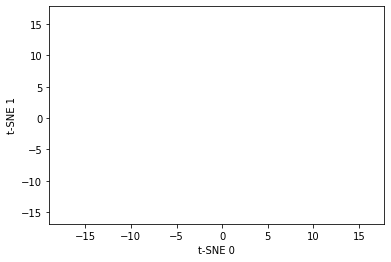

In [10]:
for i in range(len(all_data_x)): 
    if data_y[i] == 3:
        plt.text(digits_tsne[i, 0], digits_tsne[i, 1], # x,y
                 data_y[i], # 그룹
                 color=colors[data_y[i]], # 색상
                 fontdict={'weight': 'bold', 'size':9}) # font

plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max()) # 최소, 최대
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max()) # 최소, 최대

plt.xlabel('t-SNE 0') # x축 이름
plt.ylabel('t-SNE 1') # y축 이름
plt.show() # 그래프 출력

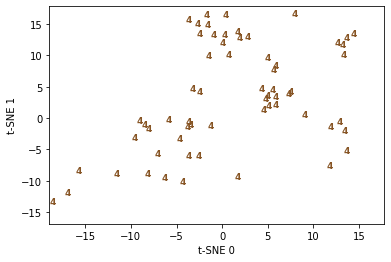

In [27]:
for i in range(len(all_data_x)): 
    if data_y[i] == 4:
        plt.text(digits_tsne[i, 0], digits_tsne[i, 1], # x,y
                 data_y[i], # 그룹
                 color=colors[data_y[i]], # 색상
                 fontdict={'weight': 'bold', 'size':9}) # font

plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max()) # 최소, 최대
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max()) # 최소, 최대

plt.xlabel('t-SNE 0') # x축 이름
plt.ylabel('t-SNE 1') # y축 이름
plt.show() # 그래프 출력

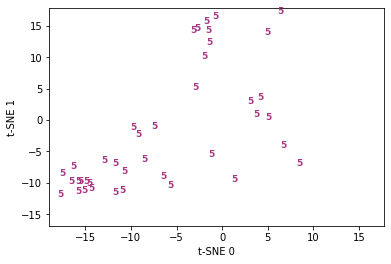

In [26]:
for i in range(len(all_data_x)): 
    if data_y[i] == 5:
        plt.text(digits_tsne[i, 0], digits_tsne[i, 1], # x,y
                 data_y[i], # 그룹
                 color=colors[data_y[i]], # 색상
                 fontdict={'weight': 'bold', 'size':9}) # font

plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max()) # 최소, 최대
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max()) # 최소, 최대

plt.xlabel('t-SNE 0') # x축 이름
plt.ylabel('t-SNE 1') # y축 이름
plt.show() # 그래프 출력

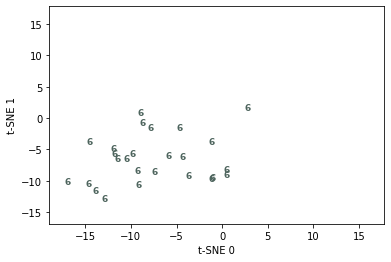

In [25]:
for i in range(len(all_data_x)): 
    if data_y[i] == 6:
        plt.text(digits_tsne[i, 0], digits_tsne[i, 1], # x,y
                 data_y[i], # 그룹
                 color=colors[data_y[i]], # 색상
                 fontdict={'weight': 'bold', 'size':9}) # font

plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max()) # 최소, 최대
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max()) # 최소, 최대

plt.xlabel('t-SNE 0') # x축 이름
plt.ylabel('t-SNE 1') # y축 이름
plt.show() # 그래프 출력

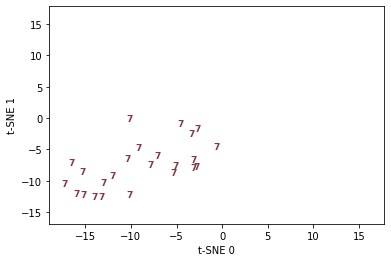

In [24]:
for i in range(len(all_data_x)): 
    if data_y[i] == 7:
        plt.text(digits_tsne[i, 0], digits_tsne[i, 1], # x,y
                 data_y[i], # 그룹
                 color=colors[data_y[i]], # 색상
                 fontdict={'weight': 'bold', 'size':9}) # font

plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max()) # 최소, 최대
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max()) # 최소, 최대

plt.xlabel('t-SNE 0') # x축 이름
plt.ylabel('t-SNE 1') # y축 이름
plt.show() # 그래프 출력

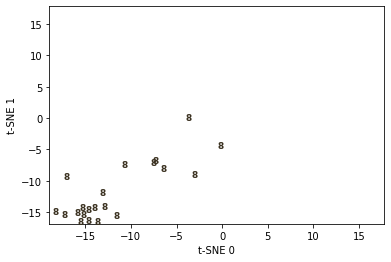

In [23]:
for i in range(len(all_data_x)): 
    if data_y[i] == 8:
        plt.text(digits_tsne[i, 0], digits_tsne[i, 1], # x,y
                 data_y[i], # 그룹
                 color=colors[data_y[i]], # 색상
                 fontdict={'weight': 'bold', 'size':9}) # font

plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max()) # 최소, 최대
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max()) # 최소, 최대

plt.xlabel('t-SNE 0') # x축 이름
plt.ylabel('t-SNE 1') # y축 이름
plt.show() # 그래프 출력

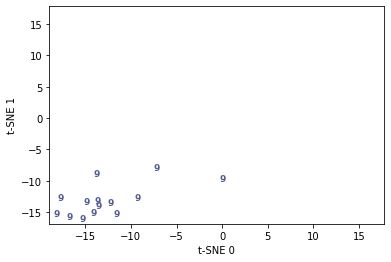

In [22]:
for i in range(len(all_data_x)): 
    if data_y[i] == 9:
        plt.text(digits_tsne[i, 0], digits_tsne[i, 1], # x,y
                 data_y[i], # 그룹
                 color=colors[data_y[i]], # 색상
                 fontdict={'weight': 'bold', 'size':9}) # font

plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max()) # 최소, 최대
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max()) # 최소, 최대

plt.xlabel('t-SNE 0') # x축 이름
plt.ylabel('t-SNE 1') # y축 이름
plt.show() # 그래프 출력